In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df1 = pd.read_csv("Data_Sources/movies_data.csv")
#drop negative value
df = df1.iloc[1:]
df


,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,tagline,title,vote_average,vote_count,cast,director
1,300000000,"Adventure,Fantasy,Action",ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",United States of America,961000000,169,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",Gore Verbinski
2,245000000,"Action,Adventure,Crime",spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']",United Kingdom,880674609,148,A Plan No One Escapes,Spectre,6.3,4466,"Daniel Craig, Christoph Waltz, L\u00e9a Seydou...",Sam Mendes
3,250000000,"Action,Crime,Drama,Thriller",dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",United States of America,1084939099,165,The Legend Ends,The Dark Knight Rises,7.6,9106,"Christian Bale, Michael Caine, Gary Oldman, An...",Christopher Nolan
4,260000000,"Action,Adventure,Science,Fiction",based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],United States of America,284139100,132,"Lost in our world, found in another.",John Carter,6.1,2124,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",Andrew Stanton
5,258000000,"Fantasy,Action,Adventure",dual identity amnesia sandstorm love of one's ...,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"['Columbia Pictures', 'Laura Ziskin Production...",United States of America,890871626,139,The battle within.,Spider-Man 3,5.9,3576,"Tobey Maguire, Kirsten Dunst, James Franco, Th...",Sam Raimi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,220000,"Action,Crime,Thriller",united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,['Columbia Pictures'],Mexico,2040920,81,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"Carlos Gallardo, Jaime de, Hoyos Peter, Marqua...",Robert Rodriguez
4797,9000,"Comedy,Romance",",",en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],",",0,85,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"Edward Burns, Kerry Bish\u00e9, Marsha Dietlei...",Edward Burns
4798,0,"Comedy,Drama,Romance,TV,Movie",date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"['Front Street Pictures', 'Muse Entertainment ...",United States of America,0,120,",","Signed, Sealed, Delivered",7.0,6,"Eric Mabius, Kristin Booth, Crystal Lowe, Geof...",Scott Smith
4799,0,",",",",en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],United States of America,0,98,A New Yorker in Shanghai,Shanghai Calling,5.7,7,"Daniel Henney, Eliza Coupe, Bill Paxton, Alan ...",Daniel Hsia


In [3]:
# split the genres column into multiple columns
genres = df['genres'].str.split(',', expand=True)


# add the new columns to the dataframe
df = pd.concat([df, genres], axis=1)



In [4]:

# compute the mean revenue for each genre
genre_revenue = df.groupby(0)['revenue'].mean()

genre_df = pd.DataFrame({
    'genre':genre_revenue.index,
    'avg_revenue': df.groupby(0)['revenue'].mean(),
    'avg_rating': df.groupby(0)['vote_average'].mean()
})

genre_df = genre_df.reset_index(drop=True)
genre_df = genre_df.drop(index=0).reset_index(drop=True)
genre_df



,genre,avg_revenue,avg_rating
0,Action,1.183207e+08,5.936388
1,Adventure,2.109611e+08,6.305605
2,Animation,2.417656e+08,6.273984
3,Comedy,5.178074e+07,5.932342
4,Crime,4.832888e+07,6.428718
5,Documentary,8.851544e+06,6.248864
6,Drama,4.540021e+07,6.429519
7,Family,1.594183e+08,5.646429
8,Fantasy,1.475592e+08,6.167521
9,Foreign,5.565000e+04,7.200000


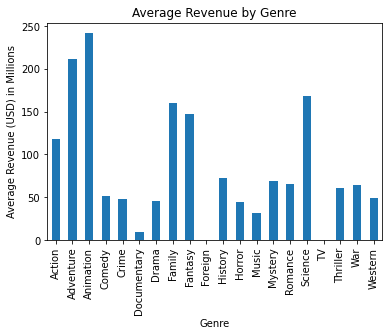

In [5]:
# create a bar chart of the average revenue by genre
fig, ax=plt.subplots(facecolor='white')
genre_df.plot.bar(x='genre', y='avg_revenue', rot=90, ax=ax)

# set the title and axis labels
plt.title('Average Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue (USD) in Millions')
ax.legend().set_visible(False)
scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

#save figure
plt.savefig('Images/genre_revenue.png', dpi=100, bbox_inches='tight')

# display the chart
plt.show()


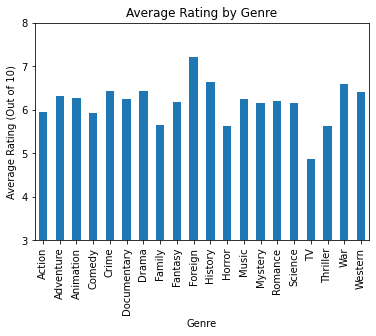

In [6]:
# create a bar chart of the average vote count by genre
fig, ax=plt.subplots(facecolor='white')
genre_df.plot.bar(x='genre', y='avg_rating', rot=90, ax=ax)

# set the title and axis labels
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating (Out of 10)')
ax.legend().set_visible(False)
plt.ylim(3, 8)


#save figure
plt.savefig('Images/genre_rating.png', dpi=100, bbox_inches='tight')

# display the chart
plt.show()

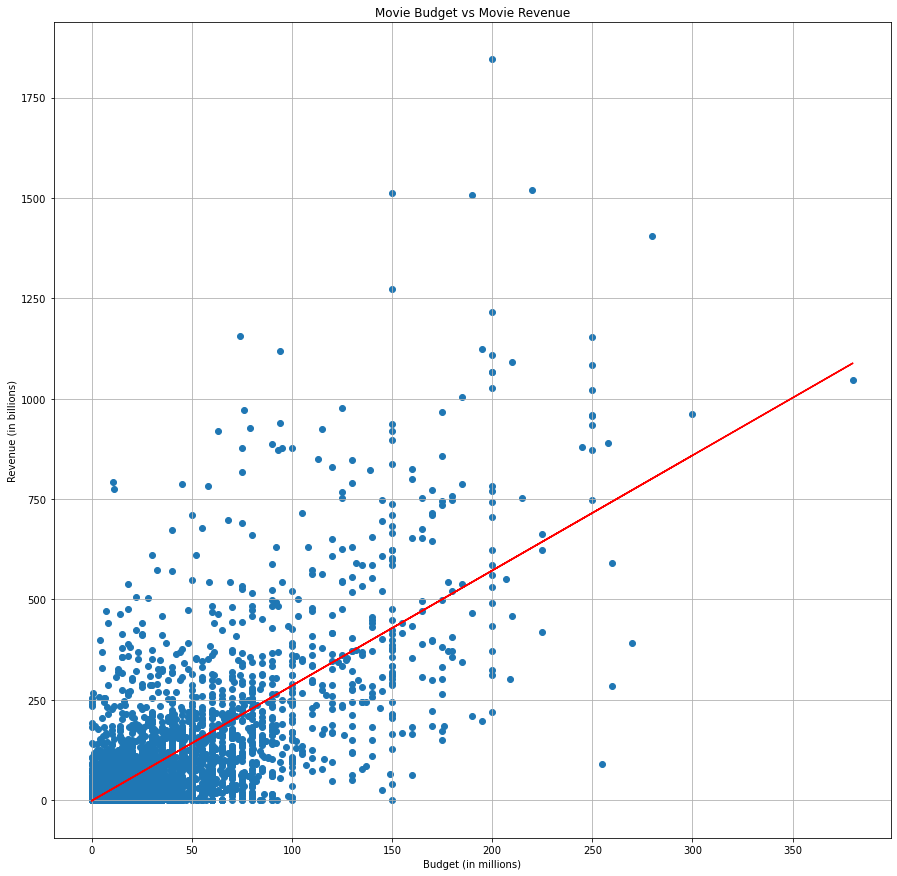

In [8]:
# create a scatter plot of movie budget vs movie revenue
fig, ax = plt.subplots(figsize=(15, 15),facecolor='white')
plt.grid()
x = df['budget']
y= df['revenue']
ax.scatter(x,y)
ax.set_xlabel('Budget (in millions)')
ax.set_ylabel('Revenue (in billions)')
ax.set_title('Movie Budget vs Movie Revenue')
scale_x = 1e6
scale_y = 1e9
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
ax.xaxis.set_major_formatter(ticks_x)
# Fit a linear regression line to the data
coeffs = np.polyfit(x, y, 1)
line = np.poly1d(coeffs)

# Plot the regression line
plt.plot(x, line(x), color='r')

#save figure
plt.savefig('Images/budget_revenue.png', dpi=100, bbox_inches='tight')

# display the plot
plt.show()